# Implement a Gradient Descent Algorithm on training a simple linear model.

## Reference
- https://www.geeksforgeeks.org/identifying-handwritten-digits-using-logistic-regression-pytorch/
- Thanks to https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Implement a Gradient Descent algorithm on training the simple linear model. 

Show how training accuracy is changing over iterations.

Try to play with different $\gamma$.

Implement some adaptive algorithm to automatically tune $\gamma$ - sometimes referred as backtracking. This is a bit challenging as you have to be able to keep a history of weights

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
from torch import nn, optim
# thanks to https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [0]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset  = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [0]:
input_dim = 28*28
output_dim = 10
linear = nn.Linear(input_dim, output_dim)

In [0]:
list(linear.parameters())

[Parameter containing:
 tensor([[-0.0243,  0.0208, -0.0018,  ..., -0.0214, -0.0306,  0.0088],
         [ 0.0265,  0.0070,  0.0237,  ..., -0.0090,  0.0045, -0.0047],
         [ 0.0132, -0.0006,  0.0011,  ...,  0.0072,  0.0297,  0.0085],
         ...,
         [ 0.0050,  0.0163,  0.0132,  ..., -0.0333, -0.0178,  0.0064],
         [-0.0012, -0.0275,  0.0189,  ..., -0.0270, -0.0109,  0.0212],
         [-0.0332, -0.0002, -0.0029,  ...,  0.0355,  0.0149,  0.0190]],
        requires_grad=True), Parameter containing:
 tensor([-0.0340, -0.0029, -0.0327,  0.0289,  0.0030,  0.0179, -0.0104,  0.0326,
          0.0263, -0.0004], requires_grad=True)]

In [0]:
# Train the model for learning rate 1
learning_rate = 0.3
BS = 60000
n_epochs = 100
loss_list_1 = []
accuracy_list_1 = []
N_train = len(train_dataset)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BS, shuffle=False)
model = nn.Linear(28*28, 10)

for epoch in range(int(n_epochs)):
    F = 0
    correct = 0
    model.zero_grad()
    for i, data in enumerate(train_loader, 0):
        images, labels = data
        prediction = torch.sigmoid(model(images.view([-1,28*28])))
        target = torch.zeros(BS,10)
        target = target
        for i, l in enumerate(labels):
            target[i,l] = 1           
        F += (torch.norm(target - prediction)**2)/ N_train
        correct += torch.sum(prediction.argmax(1) == labels).item()
    accuracy = correct / N_train
    print('Epoch: [% d/% d], Loss: %.4f'% (epoch + 1, n_epochs, F.item()))
    print('Accuracy: {:.0f}%'.format(100. * accuracy))
    loss_list_1.append(F.item())
    accuracy_list_1.append(accuracy)
    F.backward()
    model.weight.data.sub_(learning_rate*model.weight.grad)
    model.bias.data.sub_(learning_rate*model.bias.grad)
min_loss_list_1 = min(loss_list_1)

Epoch: [ 1/ 100], Loss: 2.5323
Accuracy: 12%
Epoch: [ 2/ 100], Loss: 0.9058
Accuracy: 38%
Epoch: [ 3/ 100], Loss: 0.8905
Accuracy: 49%
Epoch: [ 4/ 100], Loss: 0.8752
Accuracy: 53%
Epoch: [ 5/ 100], Loss: 0.8594
Accuracy: 55%
Epoch: [ 6/ 100], Loss: 0.8429
Accuracy: 55%
Epoch: [ 7/ 100], Loss: 0.8254
Accuracy: 55%
Epoch: [ 8/ 100], Loss: 0.8073
Accuracy: 55%
Epoch: [ 9/ 100], Loss: 0.7888
Accuracy: 56%
Epoch: [ 10/ 100], Loss: 0.7706
Accuracy: 57%
Epoch: [ 11/ 100], Loss: 0.7528
Accuracy: 58%
Epoch: [ 12/ 100], Loss: 0.7357
Accuracy: 59%
Epoch: [ 13/ 100], Loss: 0.7192
Accuracy: 61%
Epoch: [ 14/ 100], Loss: 0.7033
Accuracy: 62%
Epoch: [ 15/ 100], Loss: 0.6882
Accuracy: 63%
Epoch: [ 16/ 100], Loss: 0.6738
Accuracy: 64%
Epoch: [ 17/ 100], Loss: 0.6603
Accuracy: 65%
Epoch: [ 18/ 100], Loss: 0.6475
Accuracy: 66%
Epoch: [ 19/ 100], Loss: 0.6355
Accuracy: 67%
Epoch: [ 20/ 100], Loss: 0.6241
Accuracy: 68%
Epoch: [ 21/ 100], Loss: 0.6135
Accuracy: 69%
Epoch: [ 22/ 100], Loss: 0.6034
Accuracy: 7

In [0]:
# Train the model for learning rate 0.1
learning_rate = 0.1
BS = 60000
n_epochs = 100
loss_list_2 = []
minimum_loss = []
accuracy_list_2 = []
N_train = len(train_dataset)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BS, shuffle=False)
model = nn.Linear(28*28, 10)

for epoch in range(int(n_epochs)):
    F = 0
    correct = 0
    model.zero_grad()
    for i, data in enumerate(train_loader, 0):
        images, labels = data
        prediction = torch.sigmoid(model(images.view([-1,28*28])))
        target = torch.zeros(BS,10)
        target = target
        for i, l in enumerate(labels):
            target[i,l] = 1           
        F += (torch.norm(target - prediction)**2)/ N_train
        correct += torch.sum(prediction.argmax(1) == labels).item()
    accuracy = correct / N_train
    print('Epoch: [% d/% d], Loss: %.4f'% (epoch + 1, n_epochs, F.item()))
    print('Accuracy: {:.0f}%'.format(100. * accuracy))
    loss_list_2.append(F.item())
    accuracy_list_2.append(accuracy)
    F.backward()
    model.weight.data.sub_(learning_rate*model.weight.grad)
    model.bias.data.sub_(learning_rate*model.bias.grad)
min_loss_list_2 = min(loss_list_2)

Epoch: [ 1/ 100], Loss: 2.5015
Accuracy: 10%
Epoch: [ 2/ 100], Loss: 1.4384
Accuracy: 16%
Epoch: [ 3/ 100], Loss: 1.1668
Accuracy: 24%
Epoch: [ 4/ 100], Loss: 1.0596
Accuracy: 31%
Epoch: [ 5/ 100], Loss: 1.0021
Accuracy: 38%
Epoch: [ 6/ 100], Loss: 0.9655
Accuracy: 43%
Epoch: [ 7/ 100], Loss: 0.9397
Accuracy: 46%
Epoch: [ 8/ 100], Loss: 0.9201
Accuracy: 49%
Epoch: [ 9/ 100], Loss: 0.9043
Accuracy: 51%
Epoch: [ 10/ 100], Loss: 0.8911
Accuracy: 52%
Epoch: [ 11/ 100], Loss: 0.8796
Accuracy: 53%
Epoch: [ 12/ 100], Loss: 0.8692
Accuracy: 54%
Epoch: [ 13/ 100], Loss: 0.8597
Accuracy: 55%
Epoch: [ 14/ 100], Loss: 0.8509
Accuracy: 56%
Epoch: [ 15/ 100], Loss: 0.8426
Accuracy: 56%
Epoch: [ 16/ 100], Loss: 0.8346
Accuracy: 57%
Epoch: [ 17/ 100], Loss: 0.8269
Accuracy: 57%
Epoch: [ 18/ 100], Loss: 0.8195
Accuracy: 58%
Epoch: [ 19/ 100], Loss: 0.8123
Accuracy: 58%
Epoch: [ 20/ 100], Loss: 0.8052
Accuracy: 58%
Epoch: [ 21/ 100], Loss: 0.7983
Accuracy: 59%
Epoch: [ 22/ 100], Loss: 0.7916
Accuracy: 5

In [0]:
# Train the model for learning rate 0.01
learning_rate = 0.01
BS = 60000
n_epochs = 100
loss_list_3 = []
accuracy_list_3 = []
N_train = len(train_dataset)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BS, shuffle=False)
model = nn.Linear(28*28, 10)

for epoch in range(int(n_epochs)):
    F = 0
    correct = 0
    model.zero_grad()
    for i, data in enumerate(train_loader, 0):
        images, labels = data
        prediction = torch.sigmoid(model(images.view([-1,28*28])))
        target = torch.zeros(BS,10)
        target = target
        for i, l in enumerate(labels):
            target[i,l] = 1           
        F += (torch.norm(target - prediction)**2)/ N_train
        correct += torch.sum(prediction.argmax(1) == labels).item()
    accuracy = correct / N_train
    print('Epoch: [% d/% d], Loss: %.4f'% (epoch + 1, n_epochs, F.item()))
    print('Accuracy: {:.0f}%'.format(100. * accuracy))
    loss_list_3.append(F.item())
    accuracy_list_3.append(accuracy)
    F.backward()
    model.weight.data.sub_(learning_rate*model.weight.grad)
    model.bias.data.sub_(learning_rate*model.bias.grad)
min_loss_list_3 = min(loss_list_3)

Epoch: [ 1/ 100], Loss: 2.5067
Accuracy: 13%
Epoch: [ 2/ 100], Loss: 2.3652
Accuracy: 14%
Epoch: [ 3/ 100], Loss: 2.2369
Accuracy: 15%
Epoch: [ 4/ 100], Loss: 2.1212
Accuracy: 15%
Epoch: [ 5/ 100], Loss: 2.0174
Accuracy: 16%
Epoch: [ 6/ 100], Loss: 1.9243
Accuracy: 17%
Epoch: [ 7/ 100], Loss: 1.8410
Accuracy: 18%
Epoch: [ 8/ 100], Loss: 1.7664
Accuracy: 19%
Epoch: [ 9/ 100], Loss: 1.6995
Accuracy: 19%
Epoch: [ 10/ 100], Loss: 1.6395
Accuracy: 20%
Epoch: [ 11/ 100], Loss: 1.5856
Accuracy: 21%
Epoch: [ 12/ 100], Loss: 1.5370
Accuracy: 22%
Epoch: [ 13/ 100], Loss: 1.4932
Accuracy: 23%
Epoch: [ 14/ 100], Loss: 1.4535
Accuracy: 24%
Epoch: [ 15/ 100], Loss: 1.4175
Accuracy: 25%
Epoch: [ 16/ 100], Loss: 1.3847
Accuracy: 26%
Epoch: [ 17/ 100], Loss: 1.3548
Accuracy: 27%
Epoch: [ 18/ 100], Loss: 1.3274
Accuracy: 28%
Epoch: [ 19/ 100], Loss: 1.3023
Accuracy: 29%
Epoch: [ 20/ 100], Loss: 1.2792
Accuracy: 30%
Epoch: [ 21/ 100], Loss: 1.2580
Accuracy: 30%
Epoch: [ 22/ 100], Loss: 1.2383
Accuracy: 3

In [0]:
# Train the model for learning rate 0.001
learning_rate = 0.001
BS = 60000
n_epochs = 100
loss_list_4 = []
accuracy_list_4 = []
N_train = len(train_dataset)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BS, shuffle=False)
model = nn.Linear(28*28, 10)

for epoch in range(int(n_epochs)):
    F = 0
    correct = 0
    model.zero_grad()
    for i, data in enumerate(train_loader, 0):
        images, labels = data
        prediction = torch.sigmoid(model(images.view([-1,28*28])))
        target = torch.zeros(BS,10)
        target = target
        for i, l in enumerate(labels):
            target[i,l] = 1           
        F += (torch.norm(target - prediction)**2)/ N_train
        correct += torch.sum(prediction.argmax(1) == labels).item()
    accuracy = correct / N_train
    print('Epoch: [% d/% d], Loss: %.4f'% (epoch + 1, n_epochs, F.item()))
    print('Accuracy: {:.0f}%'.format(100. * accuracy))
    loss_list_4.append(F.item())
    accuracy_list_4.append(accuracy)
    F.backward()
    model.weight.data.sub_(learning_rate*model.weight.grad)
    model.bias.data.sub_(learning_rate*model.bias.grad)
min_loss_list_4 = min(loss_list_4)

Epoch: [ 1/ 100], Loss: 2.3869
Accuracy: 9%
Epoch: [ 2/ 100], Loss: 2.3737
Accuracy: 9%
Epoch: [ 3/ 100], Loss: 2.3607
Accuracy: 9%
Epoch: [ 4/ 100], Loss: 2.3478
Accuracy: 9%
Epoch: [ 5/ 100], Loss: 2.3350
Accuracy: 9%
Epoch: [ 6/ 100], Loss: 2.3224
Accuracy: 9%
Epoch: [ 7/ 100], Loss: 2.3099
Accuracy: 9%
Epoch: [ 8/ 100], Loss: 2.2975
Accuracy: 9%
Epoch: [ 9/ 100], Loss: 2.2852
Accuracy: 9%
Epoch: [ 10/ 100], Loss: 2.2730
Accuracy: 9%
Epoch: [ 11/ 100], Loss: 2.2610
Accuracy: 9%
Epoch: [ 12/ 100], Loss: 2.2491
Accuracy: 9%
Epoch: [ 13/ 100], Loss: 2.2373
Accuracy: 10%
Epoch: [ 14/ 100], Loss: 2.2256
Accuracy: 10%
Epoch: [ 15/ 100], Loss: 2.2141
Accuracy: 10%
Epoch: [ 16/ 100], Loss: 2.2027
Accuracy: 10%
Epoch: [ 17/ 100], Loss: 2.1913
Accuracy: 10%
Epoch: [ 18/ 100], Loss: 2.1801
Accuracy: 10%
Epoch: [ 19/ 100], Loss: 2.1691
Accuracy: 10%
Epoch: [ 20/ 100], Loss: 2.1581
Accuracy: 10%
Epoch: [ 21/ 100], Loss: 2.1472
Accuracy: 10%
Epoch: [ 22/ 100], Loss: 2.1365
Accuracy: 10%
Epoch: [ 

In [0]:
# Train the model for learning rate 0.0001
learning_rate = 0.0001
BS = 60000
n_epochs = 100
loss_list_5 = []
accuracy_list_5 = []
N_train = len(train_dataset)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BS, shuffle=False)
model = nn.Linear(28*28, 10)

for epoch in range(int(n_epochs)):
    F = 0
    correct = 0
    model.zero_grad()
    for i, data in enumerate(train_loader, 0):
        images, labels = data
        prediction = torch.sigmoid(model(images.view([-1,28*28])))
        target = torch.zeros(BS,10)
        target = target
        for i, l in enumerate(labels):
            target[i,l] = 1           
        F += (torch.norm(target - prediction)**2)/ N_train
        correct += torch.sum(prediction.argmax(1) == labels).item()
    accuracy = correct / N_train
    print('Epoch: [% d/% d], Loss: %.4f'% (epoch + 1, n_epochs, F.item()))
    print('Accuracy: {:.0f}%'.format(100. * accuracy))
    loss_list_5.append(F.item())
    accuracy_list_5.append(accuracy)
    F.backward()
    model.weight.data.sub_(learning_rate*model.weight.grad)
    model.bias.data.sub_(learning_rate*model.bias.grad)
min_loss_list_5 = min(loss_list_5)

Epoch: [ 1/ 100], Loss: 2.4919
Accuracy: 8%
Epoch: [ 2/ 100], Loss: 2.4904
Accuracy: 8%
Epoch: [ 3/ 100], Loss: 2.4890
Accuracy: 8%
Epoch: [ 4/ 100], Loss: 2.4876
Accuracy: 8%
Epoch: [ 5/ 100], Loss: 2.4862
Accuracy: 8%
Epoch: [ 6/ 100], Loss: 2.4848
Accuracy: 8%
Epoch: [ 7/ 100], Loss: 2.4834
Accuracy: 8%
Epoch: [ 8/ 100], Loss: 2.4820
Accuracy: 8%
Epoch: [ 9/ 100], Loss: 2.4805
Accuracy: 8%
Epoch: [ 10/ 100], Loss: 2.4792
Accuracy: 8%
Epoch: [ 11/ 100], Loss: 2.4778
Accuracy: 8%
Epoch: [ 12/ 100], Loss: 2.4764
Accuracy: 8%
Epoch: [ 13/ 100], Loss: 2.4749
Accuracy: 8%
Epoch: [ 14/ 100], Loss: 2.4735
Accuracy: 8%
Epoch: [ 15/ 100], Loss: 2.4722
Accuracy: 8%
Epoch: [ 16/ 100], Loss: 2.4708
Accuracy: 8%
Epoch: [ 17/ 100], Loss: 2.4694
Accuracy: 8%
Epoch: [ 18/ 100], Loss: 2.4680
Accuracy: 8%
Epoch: [ 19/ 100], Loss: 2.4666
Accuracy: 8%
Epoch: [ 20/ 100], Loss: 2.4652
Accuracy: 8%
Epoch: [ 21/ 100], Loss: 2.4638
Accuracy: 8%
Epoch: [ 22/ 100], Loss: 2.4624
Accuracy: 8%
Epoch: [ 23/ 100], 

In [0]:
# Train the model for learning rate 0.00001
learning_rate = 0.00001
BS = 60000
n_epochs = 100
loss_list_6 = []
accuracy_list_6 = []
N_train = len(train_dataset)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BS, shuffle=False)
model = nn.Linear(28*28, 10)

for epoch in range(int(n_epochs)):
    F = 0
    correct = 0
    model.zero_grad()
    for i, data in enumerate(train_loader, 0):
        images, labels = data
        prediction = torch.sigmoid(model(images.view([-1,28*28])))
        target = torch.zeros(BS,10)
        target = target
        for i, l in enumerate(labels):
            target[i,l] = 1           
        F += (torch.norm(target - prediction)**2)/ N_train
        correct += torch.sum(prediction.argmax(1) == labels).item()
    accuracy = correct / N_train
    print('Epoch: [% d/% d], Loss: %.4f'% (epoch + 1, n_epochs, F.item()))
    print('Accuracy: {:.0f}%'.format(100. * accuracy))
    loss_list_6.append(F.item())
    accuracy_list_6.append(accuracy)
    F.backward()
    model.weight.data.sub_(learning_rate*model.weight.grad)
    model.bias.data.sub_(learning_rate*model.bias.grad)
min_loss_list_6 = min(loss_list_6)

Epoch: [ 1/ 100], Loss: 2.5736
Accuracy: 13%
Epoch: [ 2/ 100], Loss: 2.5734
Accuracy: 13%
Epoch: [ 3/ 100], Loss: 2.5733
Accuracy: 13%
Epoch: [ 4/ 100], Loss: 2.5731
Accuracy: 13%
Epoch: [ 5/ 100], Loss: 2.5730
Accuracy: 13%
Epoch: [ 6/ 100], Loss: 2.5728
Accuracy: 13%
Epoch: [ 7/ 100], Loss: 2.5727
Accuracy: 13%
Epoch: [ 8/ 100], Loss: 2.5725
Accuracy: 13%
Epoch: [ 9/ 100], Loss: 2.5724
Accuracy: 13%
Epoch: [ 10/ 100], Loss: 2.5722
Accuracy: 13%
Epoch: [ 11/ 100], Loss: 2.5721
Accuracy: 13%
Epoch: [ 12/ 100], Loss: 2.5719
Accuracy: 13%
Epoch: [ 13/ 100], Loss: 2.5718
Accuracy: 13%
Epoch: [ 14/ 100], Loss: 2.5716
Accuracy: 13%
Epoch: [ 15/ 100], Loss: 2.5715
Accuracy: 13%
Epoch: [ 16/ 100], Loss: 2.5713
Accuracy: 13%
Epoch: [ 17/ 100], Loss: 2.5712
Accuracy: 13%
Epoch: [ 18/ 100], Loss: 2.5710
Accuracy: 13%
Epoch: [ 19/ 100], Loss: 2.5709
Accuracy: 13%
Epoch: [ 20/ 100], Loss: 2.5707
Accuracy: 13%
Epoch: [ 21/ 100], Loss: 2.5706
Accuracy: 13%
Epoch: [ 22/ 100], Loss: 2.5704
Accuracy: 1

In [0]:
loss_list_6

[2.5735812187194824,
 2.5734329223632812,
 2.5732734203338623,
 2.573120355606079,
 2.5729684829711914,
 2.5728073120117188,
 2.5726590156555176,
 2.5725090503692627,
 2.5723588466644287,
 2.5722098350524902,
 2.572067975997925,
 2.571913242340088,
 2.571761131286621,
 2.57161808013916,
 2.571463108062744,
 2.5713179111480713,
 2.571164608001709,
 2.571009397506714,
 2.5708565711975098,
 2.570704936981201,
 2.570561647415161,
 2.5704150199890137,
 2.5702595710754395,
 2.570110559463501,
 2.569957971572876,
 2.569807291030884,
 2.5696523189544678,
 2.5695078372955322,
 2.5693559646606445,
 2.5692062377929688,
 2.5690596103668213,
 2.568903684616089,
 2.568753957748413,
 2.568605661392212,
 2.5684502124786377,
 2.56830096244812,
 2.568157434463501,
 2.568012237548828,
 2.567856550216675,
 2.5677061080932617,
 2.567549705505371,
 2.5674078464508057,
 2.567265033721924,
 2.5671112537384033,
 2.5669615268707275,
 2.566812753677368,
 2.5666582584381104,
 2.566514492034912,
 2.566371202468872

<Figure size 432x288 with 0 Axes>

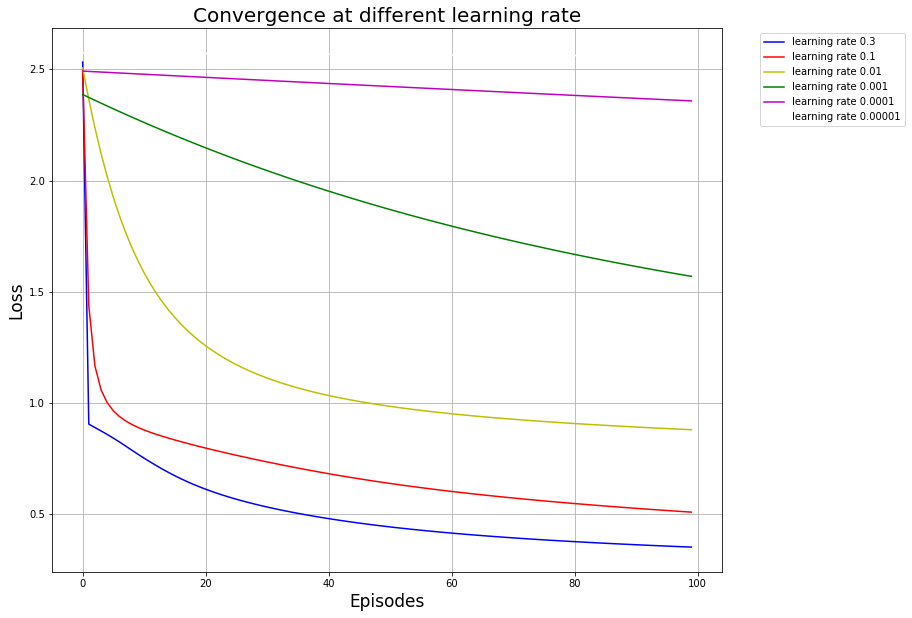

In [0]:
# Plotting convergence at different learning rate
plt.figure()
plt.figure(figsize=[12, 10])
a, = plt.plot(loss_list_1,color='b',label='learning rate 0.3')
b, = plt.plot(loss_list_2,color='r',label='learning rate 0.1')
c, = plt.plot(loss_list_3,color='y',label='learning rate 0.01')
d, = plt.plot(loss_list_4,color='g',label='learning rate 0.001')
e, = plt.plot(loss_list_5,color='m',label='learning rate 0.0001')
f, = plt.plot(loss_list_6,color='w',label='learning rate 0.00001')
plt.grid(True)
plt.title('Convergence at different learning rate',fontsize=20)
plt.xlabel('Episodes',fontsize=17)
plt.ylabel('Loss',fontsize=17)
plt.legend(bbox_to_anchor=(1.05, 1),handles=[a,b,c,d,e,f],loc='best')

In [0]:
min_loss_list = [min_loss_list_1,min_loss_list_2,min_loss_list_3,min_loss_list_4,min_loss_list_5,min_loss_list_6]

([<matplotlib.axis.XTick at 0x7fca11dcaeb8>,
 <a list of 6 Text xticklabel objects>)

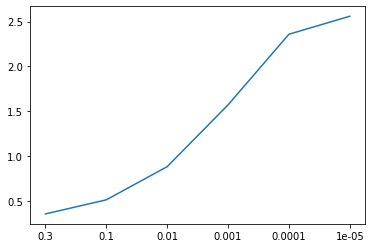

In [0]:
plt.plot(min_loss_list)
positions = (0, 1, 2, 3, 4, 5)
labels = (0.3, 0.1, 0.01, 0.001, 0.0001, 0.00001)
plt.xticks(positions, labels)

<Figure size 432x288 with 0 Axes>

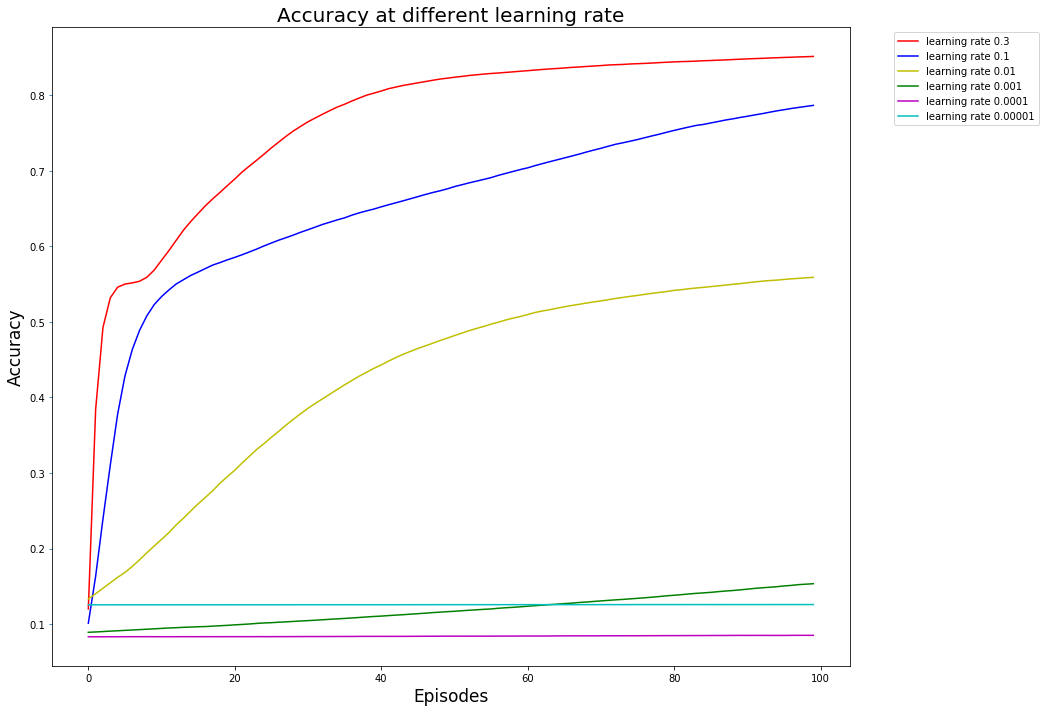

In [0]:
# Plot the loss and accuracy

# fig, ax1 = plt.subplots()
# ax1.plot(loss_list_1,color='r')
# ax1.plot(loss_list_2,color='b')
# ax1.plot(loss_list_3,color='y')
# ax1.plot(loss_list_4,color='g')
# ax1.plot(loss_list_5,color='m')
# ax1.plot(loss_list_6,color='c')
# color = 'tab:red'
# ax1.set_xlabel('epoch',color=color)
# ax1.set_ylabel('total loss',color=color)
# ax1.tick_params(axis='y', color=color)
    
# ax2 = ax1.twinx()  
plt.figure()
plt.figure(figsize=[12, 10])
plt.title('Accuracy at different learning rate',fontsize=20)
plt.xlabel('Episodes',fontsize=17)
plt.ylabel('Accuracy',fontsize=17)
a, = plt.plot(accuracy_list_1,color='r',label='learning rate 0.3')
b, = plt.plot(accuracy_list_2,color='b',label='learning rate 0.1')
c, = plt.plot(accuracy_list_3,color='y',label='learning rate 0.01')
d, = plt.plot(accuracy_list_4,color='g',label='learning rate 0.001')
e, = plt.plot(accuracy_list_5,color='m',label='learning rate 0.0001')
f, = plt.plot(accuracy_list_6,color='c',label='learning rate 0.00001')
plt.tick_params(axis='y', color=color)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1),handles=[a,b,c,d,e,f],loc='best')